<a href="https://colab.research.google.com/github/Manojgutta19/Projects/blob/main/Road_Safety_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report


In [3]:
info = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes.csv")
print(info)

        CRASH DATE CRASH TIME    BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
0       09/11/2021       2:39        NaN       NaN        NaN        NaN   
1       03/26/2022      11:45        NaN       NaN        NaN        NaN   
2       06/29/2022       6:55        NaN       NaN        NaN        NaN   
3       09/11/2021       9:35   BROOKLYN   11208.0  40.667202 -73.866500   
4       12/14/2021       8:13   BROOKLYN   11233.0  40.683304 -73.917274   
...            ...        ...        ...       ...        ...        ...   
526998  11/29/2018      14:28  MANHATTAN   10004.0  40.704952 -74.009060   
526999  12/05/2018      17:00  MANHATTAN   10026.0  40.800750 -73.958660   
527000  11/28/2018       9:01        NaN       NaN  40.611786 -74.144870   
527001  11/19/2018       6:34   BROOKLYN   11207.0  40.677357 -73.886870   
527002  11/23/2018      16:00        NaN       NaN        NaN        NaN   

                       LOCATION                    ON STREET NAME  \
0                 

In [4]:
info.count()

,0
CRASH DATE,527003
CRASH TIME,527003
BOROUGH,343303
ZIP CODE,343225
LATITUDE,483594
LONGITUDE,483594
LOCATION,483594
ON STREET NAME,392284
CROSS STREET NAME,252051
OFF STREET NAME,134677


In [5]:
print(len(info.columns))

29


In [6]:
info.describe()

,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,343225.000000,483594.000000,483594.000000,527002.000000,527001.000000,527003.000000,527003.000000,527003.000000,527003.000000,527003.000000,527003.000000,5.270020e+05
mean,10891.613172,40.493710,-73.492976,0.376268,0.001918,0.060330,0.000854,0.036353,0.000173,0.272439,0.000841,4.297984e+06
std,529.096601,3.067300,5.568642,0.740811,0.045875,0.249606,0.029403,0.190363,0.013139,0.706445,0.031731,1.527650e+05
min,10000.000000,0.000000,-201.237060,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.456194e+06
25%,10456.000000,40.667095,-73.963520,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.166159e+06
50%,11208.000000,40.717754,-73.919370,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.298032e+06
75%,11354.000000,40.779434,-73.863000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.429828e+06
max,11697.000000,40.912884,0.000000,40.000000,4.000000,7.000000,2.000000,3.000000,1.000000,40.000000,4.000000,4.777763e+06


In [7]:

clean = 'ZIP CODE'

info = info.drop(['VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'OFF STREET NAME'], axis=1)


# Remove rows with null values in the column
info = info.dropna(subset=[clean])
# Replace NaN and inf values with 0 in columns
columns_to_replace = ['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','NUMBER OF PEDESTRIANS INJURED','NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED','NUMBER OF MOTORIST INJURED','NUMBER OF MOTORIST KILLED','CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2','CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5']
info[columns_to_replace] = info[columns_to_replace].replace([np.inf, -np.inf, np.nan], 0)


# Write the updated DataFrame back to a new CSV file
info.to_csv('cleaned.csv', index=False)

In [10]:

data = pd.read_csv('cleaned.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343225 entries, 0 to 343224
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH DATE                     343225 non-null  object 
 1   CRASH TIME                     343225 non-null  object 
 2   BOROUGH                        343225 non-null  object 
 3   ZIP CODE                       343225 non-null  float64
 4   LATITUDE                       332967 non-null  float64
 5   LONGITUDE                      332967 non-null  float64
 6   LOCATION                       332967 non-null  object 
 7   ON STREET NAME                 213432 non-null  object 
 8   CROSS STREET NAME              213293 non-null  object 
 9   NUMBER OF PERSONS INJURED      343225 non-null  float64
 10  NUMBER OF PERSONS KILLED       343225 non-null  float64
 11  NUMBER OF PEDESTRIANS INJURED  343225 non-null  int64  
 12  NUMBER OF PEDESTRIANS KILLED  

In [11]:
column_names = list(data.columns.values)
print(column_names)

['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2']


In [12]:
print(data)

        CRASH DATE CRASH TIME    BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
0       09/11/2021       9:35   BROOKLYN   11208.0  40.667202 -73.866500   
1       12/14/2021       8:13   BROOKLYN   11233.0  40.683304 -73.917274   
2       12/14/2021       8:17      BRONX   10475.0  40.868160 -73.831480   
3       12/14/2021      21:10   BROOKLYN   11207.0  40.671720 -73.897100   
4       12/14/2021      14:58  MANHATTAN   10017.0  40.751440 -73.973970   
...            ...        ...        ...       ...        ...        ...   
343220  12/04/2018      18:40      BRONX   10465.0  40.819847 -73.810104   
343221  12/05/2018       7:50      BRONX   10457.0  40.848690 -73.903290   
343222  11/29/2018      14:28  MANHATTAN   10004.0  40.704952 -74.009060   
343223  12/05/2018      17:00  MANHATTAN   10026.0  40.800750 -73.958660   
343224  11/19/2018       6:34   BROOKLYN   11207.0  40.677357 -73.886870   

                       LOCATION                    ON STREET NAME  \
0         (40.6672

In [13]:
data.count()

,0
CRASH DATE,343225
CRASH TIME,343225
BOROUGH,343225
ZIP CODE,343225
LATITUDE,332967
LONGITUDE,332967
LOCATION,332967
ON STREET NAME,213432
CROSS STREET NAME,213293
NUMBER OF PERSONS INJURED,343225


In [14]:
dup = data.duplicated()
print(dup)

0         False
1         False
2         False
3         False
4         False
          ...  
343220    False
343221    False
343222    False
343223    False
343224    False
Length: 343225, dtype: bool


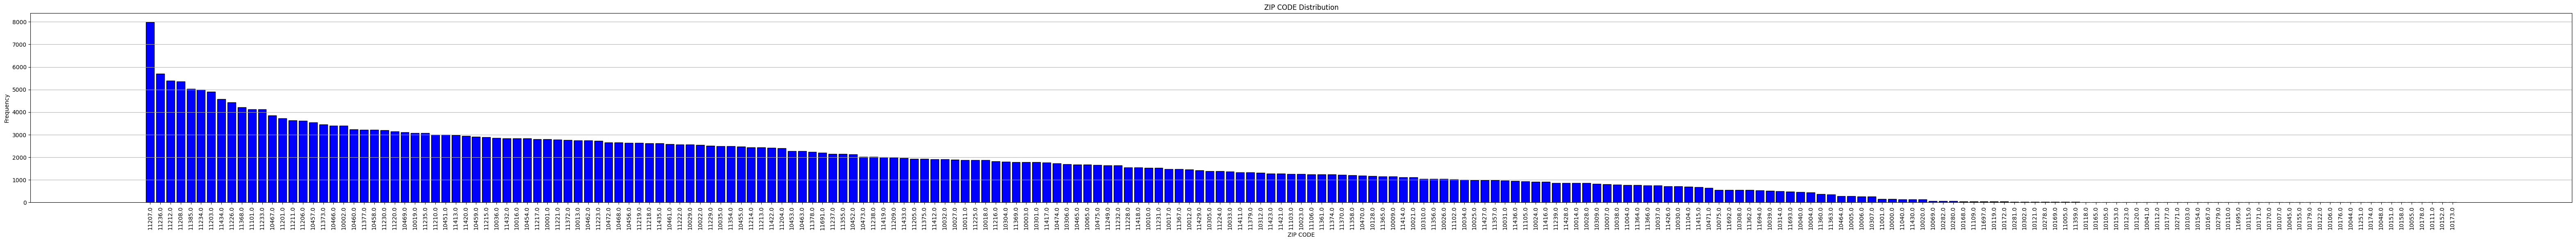

In [15]:
zip_codes = data['ZIP CODE']

# Plot the ZIP CODE data
plt.figure(figsize=(80, 6))
plt.bar(zip_codes.value_counts().index.astype(str),zip_codes.value_counts().values, color='blue', edgecolor='black')
plt.title('ZIP CODE Distribution')
plt.xlabel('ZIP CODE')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')
plt.show()

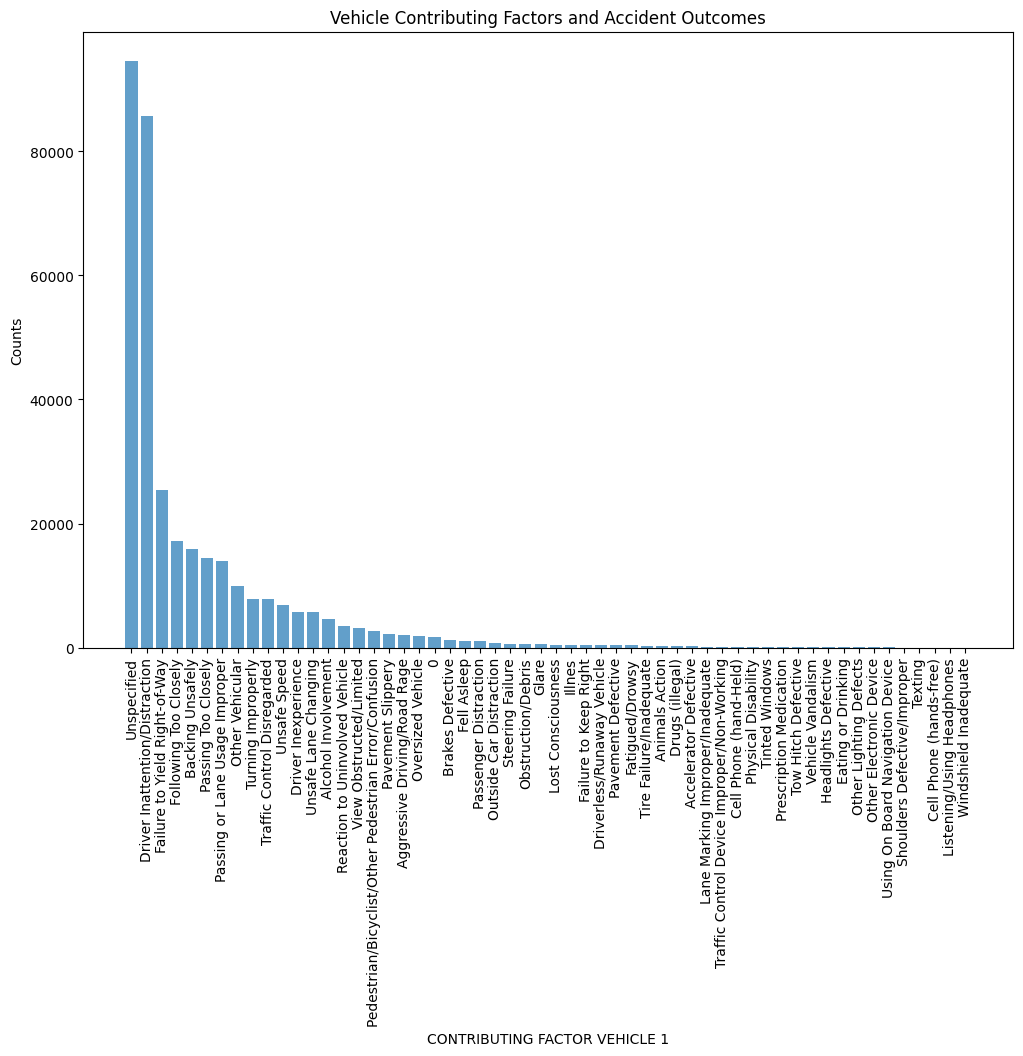

In [16]:

contributing_factor = data['CONTRIBUTING FACTOR VEHICLE 1'].astype(str)
factors_count = contributing_factor.value_counts()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the data
ax.bar(factors_count.index, factors_count, alpha=0.7)

# Set labels and title
ax.set_xlabel('CONTRIBUTING FACTOR VEHICLE 1')
ax.set_ylabel('Counts')
ax.set_title('Vehicle Contributing Factors and Accident Outcomes')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

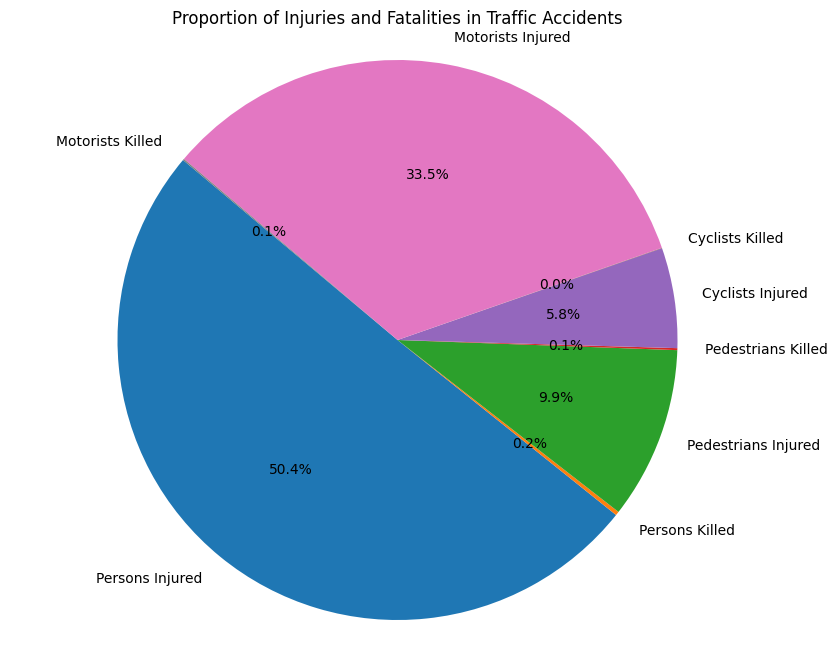

In [17]:


# Summing up the totals for each category
total_injured = data['NUMBER OF PERSONS INJURED'].sum() + data['NUMBER OF PEDESTRIANS INJURED'].sum() + data['NUMBER OF CYCLIST INJURED'].sum() + data['NUMBER OF MOTORIST INJURED'].sum()
total_killed = data['NUMBER OF PERSONS KILLED'].sum() + data['NUMBER OF PEDESTRIANS KILLED'].sum() + data['NUMBER OF CYCLIST KILLED'].sum() + data['NUMBER OF MOTORIST KILLED'].sum()

# Data to plot
labels = ['Persons Injured', 'Persons Killed', 'Pedestrians Injured', 'Pedestrians Killed', 'Cyclists Injured', 'Cyclists Killed', 'Motorists Injured', 'Motorists Killed']
sizes = [data['NUMBER OF PERSONS INJURED'].sum(), data['NUMBER OF PERSONS KILLED'].sum(), data['NUMBER OF PEDESTRIANS INJURED'].sum(), data['NUMBER OF PEDESTRIANS KILLED'].sum(), data['NUMBER OF CYCLIST INJURED'].sum(), data['NUMBER OF CYCLIST KILLED'].sum(), data['NUMBER OF MOTORIST INJURED'].sum(), data['NUMBER OF MOTORIST KILLED'].sum()]

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Injuries and Fatalities in Traffic Accidents')
plt.show()


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Question 1

In [19]:

def split_location(location):
    if isinstance(location, str):
        latitude, longitude = location.strip('()').split(', ')
        return float(latitude), float(longitude)
    else:
        return np.nan, np.nan

data['LATITUDE'], data['LONGITUDE'] = zip(*data['LOCATION'].apply(split_location))

injury_columns = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PEDESTRIANS INJURED',
                  'NUMBER OF CYCLIST INJURED', 'NUMBER OF MOTORIST INJURED',
                  'LATITUDE', 'LONGITUDE']

fatality_columns = ['NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS KILLED',
                    'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST KILLED',
                    'LATITUDE', 'LONGITUDE']

df_injuries = data[injury_columns].dropna()
df_fatalities = data[fatality_columns].dropna()

# Apply K-means clustering
kmeans_injuries = KMeans(n_clusters=3, random_state=0).fit(df_injuries)
kmeans_fatalities = KMeans(n_clusters=3, random_state=0).fit(df_fatalities)


df_injuries['cluster'] = kmeans_injuries.labels_
df_fatalities['cluster'] = kmeans_fatalities.labels_


print(df_injuries.head())
print(df_fatalities.head())


   NUMBER OF PERSONS INJURED  NUMBER OF PEDESTRIANS INJURED  \
0                        0.0                              0   
1                        0.0                              0   
2                        2.0                              0   
3                        0.0                              0   
4                        0.0                              0   

   NUMBER OF CYCLIST INJURED  NUMBER OF MOTORIST INJURED   LATITUDE  \
0                          0                           0  40.667202   
1                          0                           0  40.683304   
2                          0                           2  40.868160   
3                          0                           0  40.671720   
4                          0                           0  40.751440   

   LONGITUDE  cluster  
0 -73.866500        0  
1 -73.917274        0  
2 -73.831480        2  
3 -73.897100        0  
4 -73.973970        0  
   NUMBER OF PERSONS KILLED  NUMBER OF PEDESTRIANS

Cluster Information for Injuries:
          NUMBER OF PERSONS INJURED  NUMBER OF PEDESTRIANS INJURED  \
cluster                                                             
0                         0.129763                       0.075179   
1                         0.426712                       0.070878   
2                         1.509187                       0.040480   

         NUMBER OF CYCLIST INJURED  NUMBER OF MOTORIST INJURED   LATITUDE  \
cluster                                                                     
0                         0.045989                    0.000004  40.724761   
1                         0.047734                    0.288814   0.000000   
2                         0.011062                    1.451991  40.717835   

         LONGITUDE  
cluster             
0       -73.914639  
1         0.000000  
2       -73.904691  
Cluster Information for Fatalities:
          NUMBER OF PERSONS KILLED  NUMBER OF PEDESTRIANS KILLED  \
cluster                 

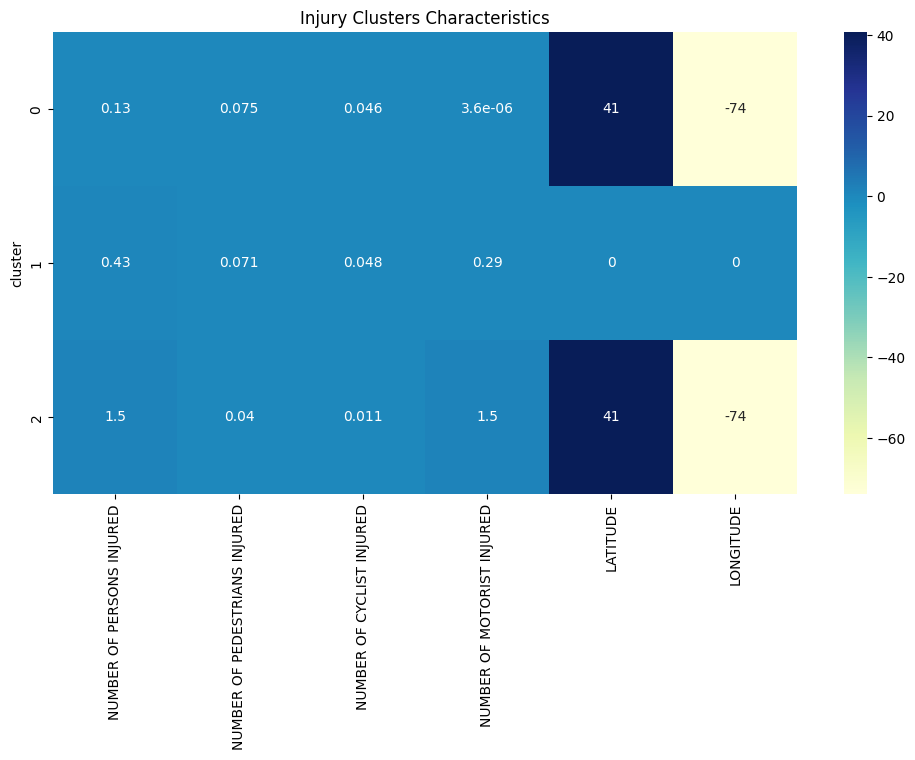

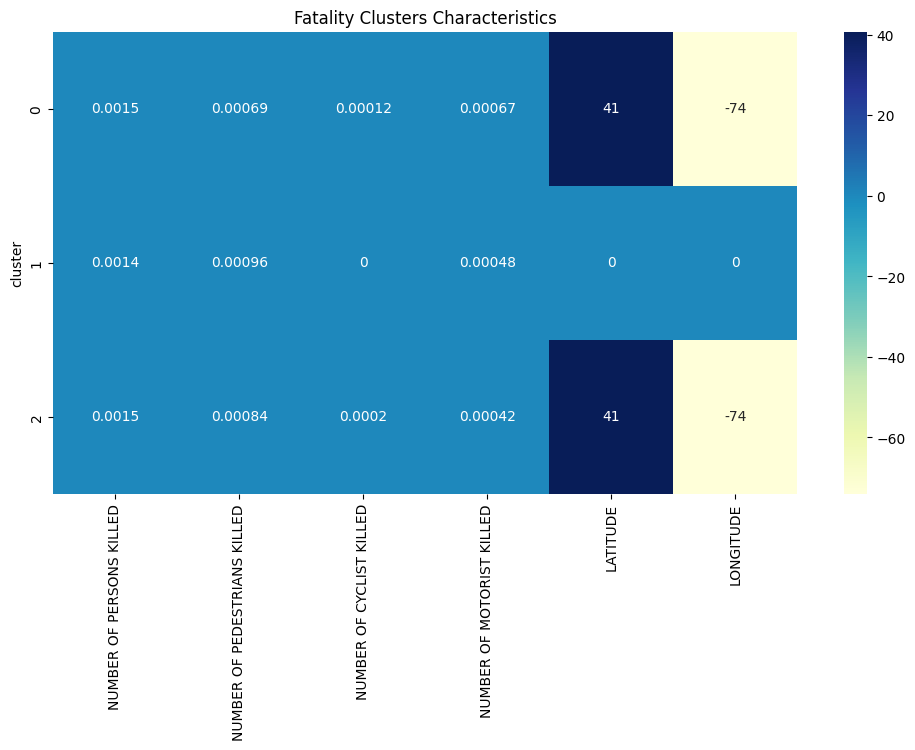

In [20]:


# Descriptive statistics for each cluster in the injuries dataset
injury_cluster_info = df_injuries.groupby('cluster').mean()
print("Cluster Information for Injuries:\n", injury_cluster_info)

# Descriptive statistics for each cluster in the fatalities dataset
fatality_cluster_info = df_fatalities.groupby('cluster').mean()
print("Cluster Information for Fatalities:\n", fatality_cluster_info)


plt.figure(figsize=(12, 6))
sns.heatmap(injury_cluster_info, annot=True, cmap="YlGnBu")
plt.title("Injury Clusters Characteristics")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(fatality_cluster_info, annot=True, cmap="YlGnBu")
plt.title("Fatality Clusters Characteristics")
plt.show()


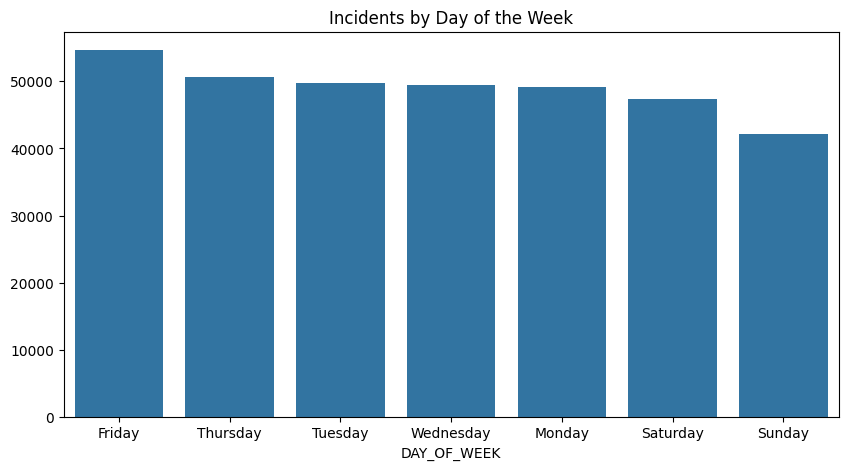

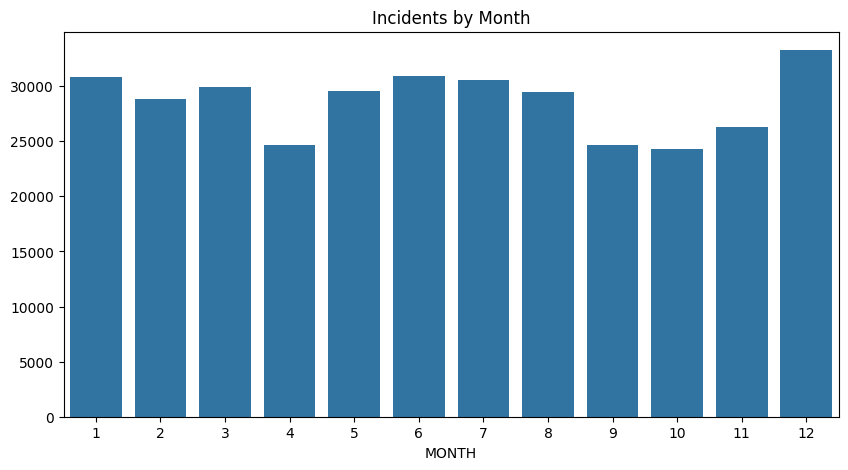

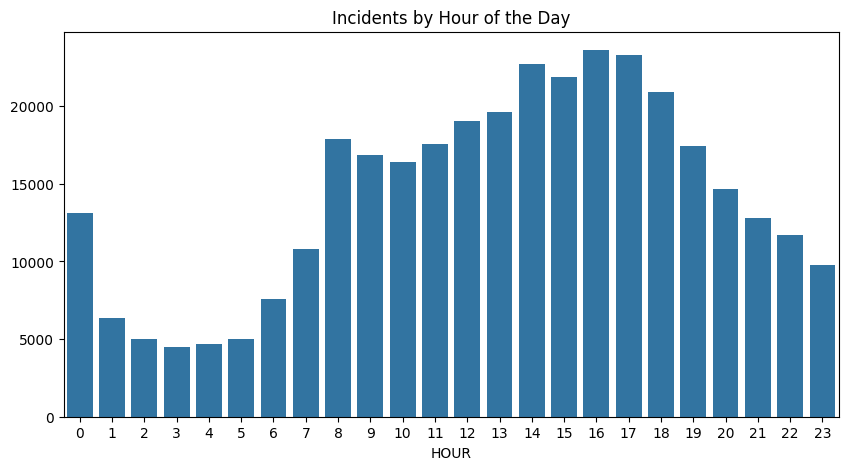

In [21]:


data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])

# Extract day of the week and month from 'CRASH DATE'
data['DAY_OF_WEEK'] = data['CRASH DATE'].dt.day_name()
data['MONTH'] = data['CRASH DATE'].dt.month

# Convert 'CRASH TIME' to datetime format and extract the hour
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M')
data['HOUR'] = data['CRASH TIME'].dt.hour

# Analyze the frequency of incidents by these time units
day_of_week_counts = data['DAY_OF_WEEK'].value_counts()
month_counts = data['MONTH'].value_counts()
hour_counts = data['HOUR'].value_counts()

# Visualize these frequencies
plt.figure(figsize=(10, 5))
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values)
plt.title("Incidents by Day of the Week")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.title("Incidents by Month")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=hour_counts.index, y=hour_counts.values)
plt.title("Incidents by Hour of the Day")
plt.show()


In [22]:




# One-hot encoding for categorical variables
encoder = OneHotEncoder()
X = encoder.fit_transform(data[['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
                                'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
                                'CONTRIBUTING FACTOR VEHICLE 5']])
y = data['NUMBER OF PERSONS KILLED']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

# Displaying the results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Optional: Feature Importance Analysis
feature_importances = model.feature_importances_
feature_names = encoder.get_feature_names_out()
importance_scores = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
sorted_importance = importance_scores.sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", sorted_importance.head(10))

Accuracy: 0.9986015004734503
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     68549
         1.0       0.00      0.00      0.00        94
         2.0       0.00      0.00      0.00         1
         3.0       0.00      0.00      0.00         1

    accuracy                           1.00     68645
   macro avg       0.25      0.25      0.25     68645
weighted avg       1.00      1.00      1.00     68645

Feature Importances:
                                                Feature  Importance
50          CONTRIBUTING FACTOR VEHICLE 1_Unsafe Speed    0.086362
59   CONTRIBUTING FACTOR VEHICLE 2_Alcohol Involvement    0.077136
83   CONTRIBUTING FACTOR VEHICLE 2_Other Lighting D...    0.067975
56                     CONTRIBUTING FACTOR VEHICLE 2_0    0.059307
47   CONTRIBUTING FACTOR VEHICLE 1_Traffic Control ...    0.058382
3    CONTRIBUTING FACTOR VEHICLE 1_Alcohol Involvement    0.053974
2    CONTRIBUTING FAC

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:





# One-hot encoding for categorical variables
encoder = OneHotEncoder()
X = encoder.fit_transform(data[['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
                                'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
                                'CONTRIBUTING FACTOR VEHICLE 5']])
y = data['NUMBER OF PERSONS INJURED']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

# Displaying the results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


feature_importances = model.feature_importances_
feature_names = encoder.get_feature_names_out()
importance_scores = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
sorted_importance = importance_scores.sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", sorted_importance.head(10))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.7615703984266881
Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.97      0.86     50083
         1.0       0.69      0.24      0.36     14830
         2.0       0.08      0.00      0.00      2518
         3.0       0.00      0.00      0.00       775
         4.0       0.00      0.00      0.00       278
         5.0       0.00      0.00      0.00       105
         6.0       0.00      0.00      0.00        28
         7.0       0.00      0.00      0.00        10
         8.0       0.00      0.00      0.00         9
         9.0       0.00      0.00      0.00         3
        10.0       0.00      0.00      0.00         4
        11.0       0.00      0.00      0.00         1
        12.0       0.00      0.00      0.00         1

    accuracy                           0.76     68645
   macro avg       0.12      0.09      0.09     68645
weighted avg       0.71      0.76      0.70     68645

Feature Importances:
     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


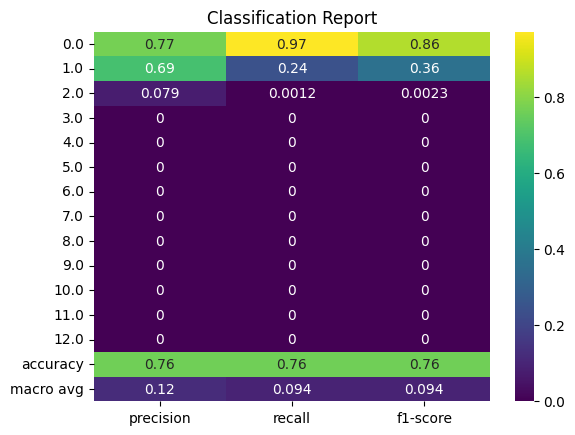

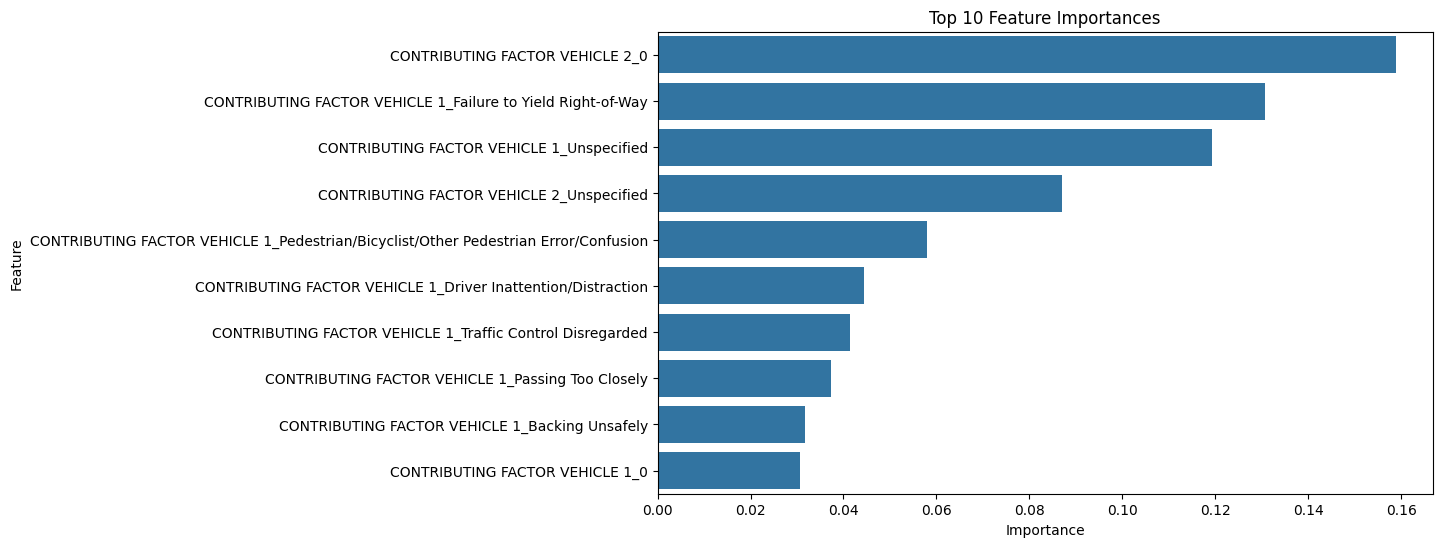

In [24]:




# 2. Classification Report Heatmap
report_dict = classification_report(y_test, predictions, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='viridis')
plt.title('Classification Report')
plt.show()

# Convert the feature importances to a DataFrame
feature_names = encoder.get_feature_names_out()
feature_importances = model.feature_importances_
importance_scores = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
sorted_importance = importance_scores.sort_values(by='Importance', ascending=False)

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=sorted_importance.head(10), x='Importance', y='Feature')
plt.title('Top 10 Feature Importances')
plt.show()
